In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns
from IPython.display import display
pd.set_option("display.max_columns", 24)

In [120]:
df_test = pd.read_csv("train.csv", index_col= 0)
df_train = pd.read_csv("test.csv", index_col= 0)
df = pd.concat([df_test, df_train])
df.reset_index(inplace=True, drop = True)
display(df.info(memory_usage = "deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

None

In [121]:
df.dropna(inplace=True)

def change_type_to_category(dataframe):
    """Iterates over the columns of data frame and changes dtype from object to category"""
    for column in dataframe.columns:
        if(dataframe.dtypes[column] == "object") and (dataframe[column].nunique() < round(0.1 * len(dataframe[column]))):
            dataframe[column] = dataframe[column].astype("category")
change_type_to_category(df)

df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].astype("int32")

In [123]:
df.dropna(inplace=True)

In [126]:
def change_type_to_int32(dataframe):
    """Iterates over the columns of data frame and changes dtype from int64 to int32 where possible"""
    for column in dataframe.columns:
        if dataframe.dtypes[column] == "int64" and dataframe[column].max() < 2**32:
            dataframe[column] = dataframe[column].astype("int32")
change_type_to_int32(df)

In [127]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129487 non-null  int32   
 1   Gender                             129487 non-null  category
 2   Customer Type                      129487 non-null  category
 3   Age                                129487 non-null  int32   
 4   Type of Travel                     129487 non-null  category
 5   Class                              129487 non-null  category
 6   Flight Distance                    129487 non-null  int32   
 7   Inflight wifi service              129487 non-null  int32   
 8   Departure/Arrival time convenient  129487 non-null  int32   
 9   Ease of Online booking             129487 non-null  int32   
 10  Gate location                      129487 non-null  int32   
 11  Food and drink                 

In [128]:
display(df.head())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied


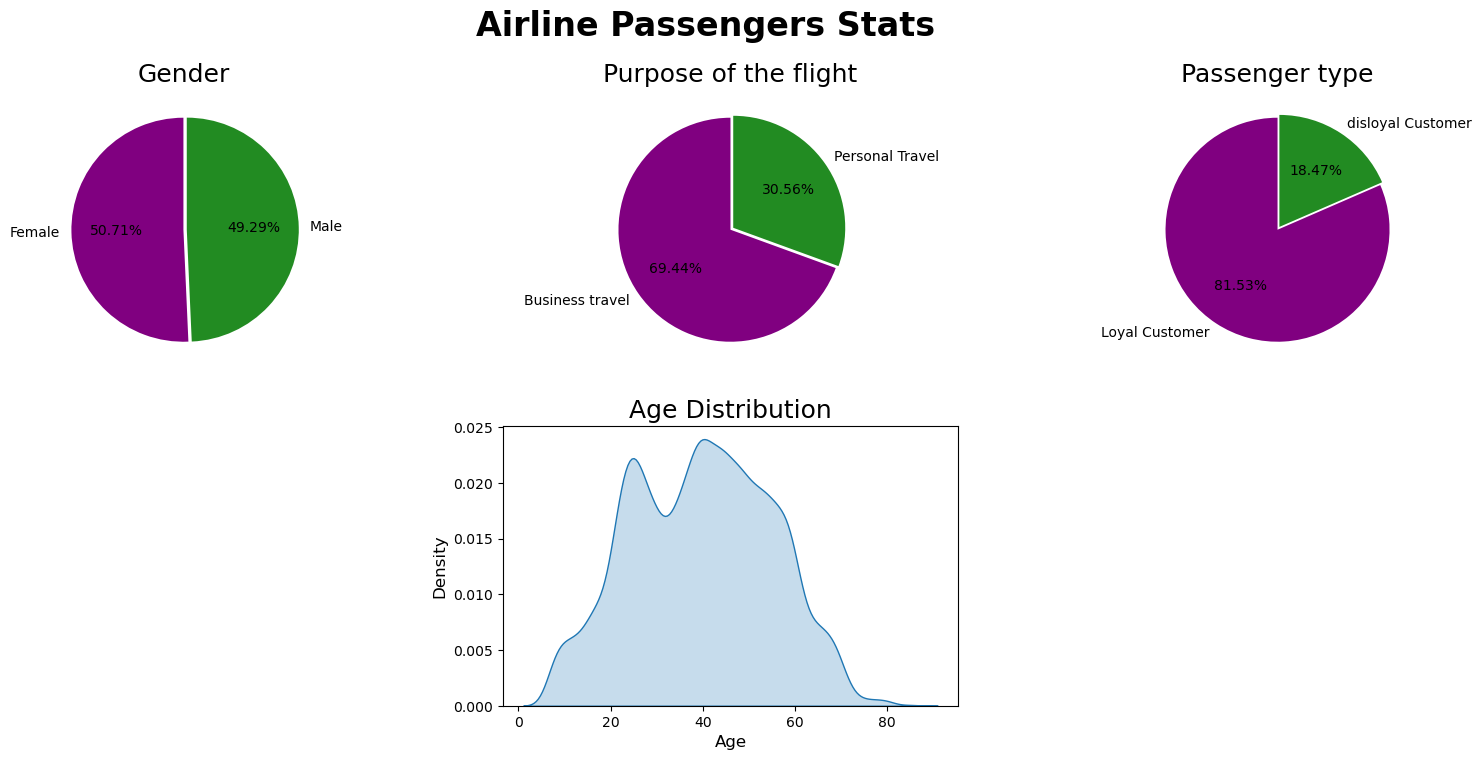

In [45]:
fig=plt.figure(figsize=(20,8))

plt.suptitle('Airline Passengers Stats', fontsize=24, fontname='sans', weight='bold')

grid=gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
#
ax0=fig.add_subplot(grid[0,0])

ax0.set_title('Gender', fontsize=18)

ax0.pie(df_train['Gender'].value_counts().values,
        labels=df['Gender'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90,)
#
ax1=fig.add_subplot(grid[0,1])

ax1.set_title('Purpose of the flight', fontsize=18)

ax1.pie(df_train['Type of Travel'].value_counts().values,
        labels=df['Type of Travel'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90)
#
ax2=fig.add_subplot(grid[0,2])

ax2.set_title('Passenger type', fontsize=18)

ax2.pie(df_train['Customer Type'].value_counts().values,
        labels=df['Customer Type'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90)

ax3=fig.add_subplot(grid[1,1:2])

ax3.set_title('Age Distribution', fontsize=18)

sns.kdeplot(df_train['Age'],fill=True)
ax3.set_xlabel('Age', fontsize=12)
ax3.set_ylabel('Density', fontsize=12)

plt.show()

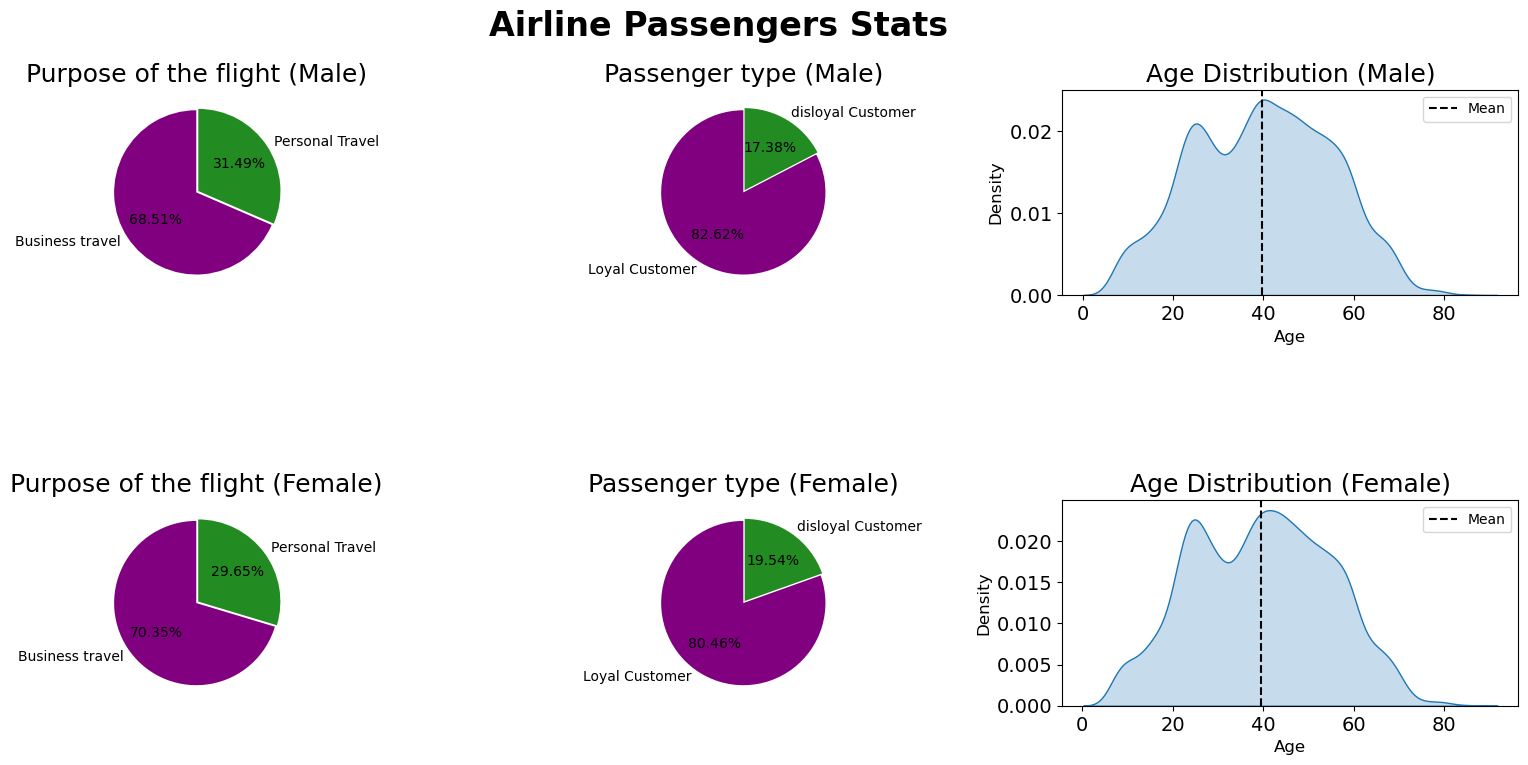

In [78]:
fig=plt.figure(figsize=(20,8))
plt.suptitle('Airline Passengers Stats', fontsize=24, fontname='sans', weight='bold')

grid=gridspec.GridSpec(ncols=3, nrows=2, figure=fig, hspace=1)
#

ax0=fig.add_subplot(grid[0,0])

ax0.set_title('Purpose of the flight (Male)', fontsize=18)

ax0.pie(df_train['Type of Travel'][df_train['Gender'] == 'Male'].value_counts().values,
        labels=df_train['Type of Travel'][df_train['Gender'] == 'Male'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90,
        )
#
ax1=fig.add_subplot(grid[0,1])

ax1.set_title('Passenger type (Male)', fontsize=18)

ax1.pie(df_train['Customer Type'][df_train['Gender'] == 'Male'].value_counts().values,
        labels=df_train['Customer Type'][df_train['Gender'] == 'Male'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90)
#
ax2=fig.add_subplot(grid[0,2])

ax2.set_title('Age Distribution (Male)', fontsize=18)

sns.kdeplot(df_train['Age'][df_train['Gender'] == 'Male'],fill=True,)

ax2.axvline(df_train['Age'][df_train['Gender'] == 'Male'].mean(), linestyle='--', color = 'k', label = 'Mean')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend()

#
ax3=fig.add_subplot(grid[1,0])

ax3.set_title('Purpose of the flight (Female)', fontsize=18)

ax3.pie(df_train['Type of Travel'][df_train['Gender'] == 'Female'].value_counts().values,
        labels=df_train['Type of Travel'][df_train['Gender'] == 'Female'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90)
#
ax4=fig.add_subplot(grid[1,1])

ax4.set_title('Passenger type (Female)', fontsize=18)

ax4.pie(df_train['Customer Type'][df_train['Gender'] == 'Female'].value_counts().values,
        labels=df_train['Customer Type'][df_train['Gender'] == 'Female'].value_counts().index,
        colors=['purple', 'forestgreen'],
        explode=(0,0.03),
        autopct='%.2f%%',
        startangle=90)
#
ax5=fig.add_subplot(grid[1,2])

ax5.set_title('Age Distribution (Female)', fontsize=18)

sns.kdeplot(df_train['Age'][df_train['Gender'] == 'Female'],fill=True,)

ax5.axvline(df_train['Age'][df_train['Gender'] == 'Female'].mean(), linestyle='--', color = 'k', label = 'Mean')
ax5.set_xlabel('Age', fontsize=12)
ax5.set_ylabel('Density', fontsize=12)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)
ax5.legend()
plt.show()